In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!rm -r darknet/ # supprimer darknet s'il existe
!git clone https://github.com/AlexeyAB/darknet.git # telecharcher darknet depuis github

/content
rm: cannot remove 'darknet/': No such file or directory
Cloning into 'darknet'...
remote: Enumerating objects: 15363, done.
remote: Total 15363 (delta 0), reused 0 (delta 0), pack-reused 15363
Receiving objects: 100% (15363/15363), 14.00 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (10330/10330), done.


In [ ]:
!head -n 24 '/content/hbibna_208_acc_pyramid_13.cfg' #reafficher les 24 premiers lignes du fichier cfg after update


[net]
# Testing
batch=32
subdivisions=16
# Training
# batch=64
# subdivisions=2
width=208
height=208
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 20000
policy=steps
steps=16000,18000
scales=.1,.1



In [ ]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/voc_label.py
!python voc_label.py
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

--2021-11-22 21:19:33--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  63.6MB/s    in 31s     

2021-11-22 21:20:05 (60.8 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-11-22 21:20:05--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  60.3MB/s    in 7.6s    

2021-11-22 21:20:13 (57.4 MB

In [ ]:
# Change the labels in obj.names to our current labels
labels_path = '/content/darknet/cfg/voc.names'
#make a list of your labels
labels = ["aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"]

with open(labels_path, 'w') as f:

    f.write('\n'.join(labels))

#check that the labels file is correct
!cat /content/darknet/cfg/voc.names

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor

In [ ]:
# Change the number of classes in obj.data.
import re
objdata = '/content/darknet/cfg/voc.data'
with open(objdata) as f:
    s = f.read()

#the number of classes is equal to the number of labels
num_classes = len(labels)   
s = re.sub('classes = \d*','classes = ' + str(num_classes),s) # remplacer classes = \d*

with open(objdata, 'w') as f:
  f.write(s)
!cat /content/darknet/cfg/voc.data

classes= 20
train  = /content/2007_train.txt
valid  = /content/2007_test.txt
names = /content/darknet/data/voc.names
backup = /content/darknet/backup



In [ ]:
# set the number of max_batches:
max_batch=50000
# calculate the 2 steps values:
step1 = 0.8 * max_batch
step2 = 0.9 * max_batch

# num_classes = len(labels)
num_filters = (num_classes + 5) * 3


cfg_file = '/content/DWH_pconv-2.cfg'

with open(cfg_file) as f:
    s = f.read()
s = re.sub('max_batches = \d*','max_batches = '+str(max_batch),s)
s = re.sub('steps=\d*,\d*','steps='+"{:.0f}".format(step1)+','+"{:.0f}".format(step2),s)
s = re.sub('classes=\d*','classes='+str(num_classes),s)
s = re.sub('pad=1\nfilters=\d*','pad=1\nfilters='+"{:.0f}".format(num_filters),s)

with open(cfg_file, 'w') as f:
  f.write(s)

In [ ]:
!head -n 24 '/content/Tiny_yolov3(208).cfg' #reafficher les 24 premiers lignes du fichier cfg after update 

[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch=64
subdivisions=16
width=208
height=208
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 50000
policy=steps
steps=40000,45000
scales=.1,.1



In [ ]:
import re
%cd darknet/
# changer les params a 1 depuis le fichier Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile 
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make
!chmod +x ./darknet # allows permission 

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

In [ ]:
!./darknet detector train '/content/darknet/cfg/voc.data' '/content/DWH_pconv-2.cfg' '/content/DWH_pconv-2_30000.weights' -dont_show -ext_output -map


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 25 Avg (IOU: 0.746669), count: 3, class_loss = 1.973000, iou_loss = 0.299145, total_loss = 2.272145 
 total_bbox = 529205, rewritten_bbox = 0.338243 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 18 Avg (IOU: 0.864907), count: 3, class_loss = 1.561000, iou_loss = 0.482261, total_loss = 2.043261 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 25 Avg (IOU: 0.511905), count: 2, class_loss = 1.107878, iou_loss = 1.022519, total_loss = 2.130397 
 total_bbox = 529210, rewritten_bbox = 0.338240 % 

 (next mAP calculation at 37176 iterations) 
 Last accuracy mAP@0.50 = 20.29 %, best = 22.01 % 
 36898: 2.279469, 1.893637 avg loss, 0.001000 rate, 0.708876 seconds, 1180736 images, 3.208074 hours left
Loaded: 0.000036 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 18 Avg (IOU: 0.873104

In [ ]:
!cp '/content/darknet/backup/DWH_pconv-2_last.weights' '/content/drive/MyDrive/cfg yolo optimization'
!cp '/content/darknet/backup/DWH_pconv-2_best.weights' '/content/drive/MyDrive/cfg yolo optimization'


In [ ]:
# difinir la fonction imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

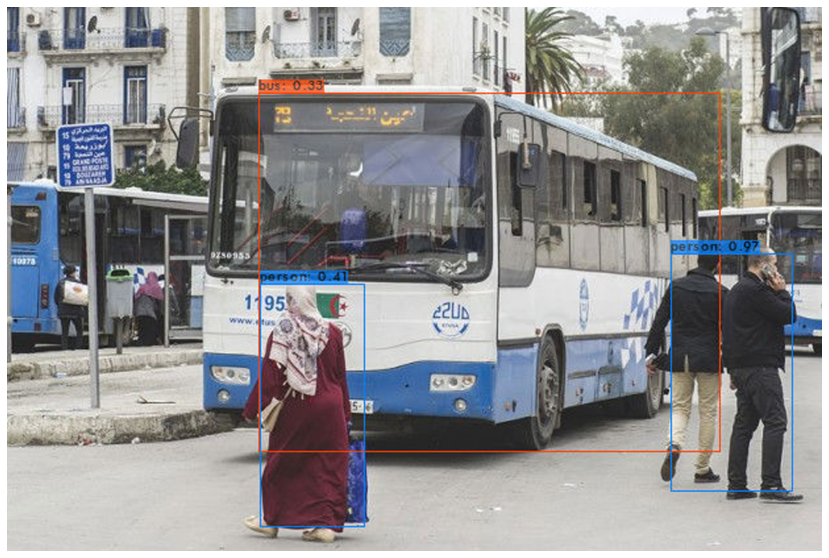

In [ ]:
!./darknet detector test '/content/darknet/cfg/voc.data' '/content/yolov3-tiny_obj(416).cfg' '/content/yolov3-tiny_obj_best-2.weights' '/content/imgVoc1.jpg' -ext_output 
imShow('predictions.jpg') # sauvegarde de l'image after use detection